### Notebook for Data Compilation

In [1]:
import pandas as pd
import netCDF4
import geopandas as gpd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

/Users/maxfield/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# total daily incoming colar energy in J m-2 at 98 Oklahoma Mesonet sites
df_timeseries=pd.read_csv('../data/solar_training_199401_200712.csv')
df_timeseries['Date']=pd.to_datetime(df_timeseries['Date'],format="%Y%m%d")
df_timeseries.head()

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,1994-01-01,12384900.0,11930700.0,12116700.0,12301200.0,10706100.0,10116900.0,11487900.0,11182800.0,10848300.0,...,10771800.0,12116400.0,11308800.0,12361800.0,11331600.0,10644300.0,11715600.0,11241000.0,10490100.0,10545300.0
1,1994-01-02,11908500.0,9778500.0,10862700.0,11666400.0,8062500.0,9262800.0,9235200.0,3963300.0,3318300.0,...,4314300.0,10733400.0,9154800.0,12041400.0,9168300.0,4082700.0,9228000.0,5829900.0,7412100.0,3345300.0
2,1994-01-03,12470700.0,9771900.0,12627300.0,12782700.0,11618400.0,10789800.0,11895900.0,4512600.0,5266500.0,...,2976900.0,11775000.0,10700400.0,12687300.0,11324400.0,2746500.0,3686700.0,4488900.0,9712200.0,4442100.0
3,1994-01-04,12725400.0,6466800.0,13065300.0,12817500.0,12134400.0,11816700.0,12186600.0,3212700.0,8270100.0,...,3476400.0,12159600.0,11907000.0,12953100.0,11903700.0,2741400.0,4905000.0,4089300.0,11401500.0,4365000.0
4,1994-01-05,10894800.0,11545200.0,8060400.0,10379400.0,6918600.0,9936300.0,6411300.0,9566100.0,8009400.0,...,6393300.0,11419500.0,7334400.0,10178700.0,7471500.0,8235300.0,11159100.0,10651500.0,10006200.0,8568300.0


In [3]:
df_train_csv = pd.read_csv('../data/train.csv')
df_train_csv['Date']=pd.to_datetime(df_train_csv['Date'],format="%Y%m%d")
df_train_csv.head()

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,1994-01-01,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300
1,1994-01-02,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,...,4314300,10733400,9154800,12041400,9168300,4082700,9228000,5829900,7412100,3345300
2,1994-01-03,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,...,2976900,11775000,10700400,12687300,11324400,2746500,3686700,4488900,9712200,4442100
3,1994-01-04,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,...,3476400,12159600,11907000,12953100,11903700,2741400,4905000,4089300,11401500,4365000
4,1994-01-05,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,...,6393300,11419500,7334400,10178700,7471500,8235300,11159100,10651500,10006200,8568300


In [335]:
df_train_csv

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,1994-01-01,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300
1,1994-01-02,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,...,4314300,10733400,9154800,12041400,9168300,4082700,9228000,5829900,7412100,3345300
2,1994-01-03,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,...,2976900,11775000,10700400,12687300,11324400,2746500,3686700,4488900,9712200,4442100
3,1994-01-04,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,...,3476400,12159600,11907000,12953100,11903700,2741400,4905000,4089300,11401500,4365000
4,1994-01-05,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,...,6393300,11419500,7334400,10178700,7471500,8235300,11159100,10651500,10006200,8568300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,2007-12-27,1408500,1371000,1742400,1389300,1349400,1466400,1245900,1674000,922500,...,1511100,1220700,1083300,1887900,1467900,1404000,1510500,1747500,1079100,1100400
5109,2007-12-28,10060800,6581700,12027300,11312100,9665100,7993800,11962200,9010500,5747700,...,3735600,7612500,6875700,12105300,11741700,3844800,7136100,5670000,7592400,6705900
5110,2007-12-29,11388000,11353800,11946900,9662400,10938300,11315100,11402400,10683300,8954400,...,10457700,10316700,10559700,11873100,11369400,10711500,11822100,11594100,9687900,10586400
5111,2007-12-30,12441000,11883300,12409200,12155400,11937600,12314100,12006000,11695800,10249500,...,11152800,12258900,12251100,12754200,12230100,11771100,12162900,11933400,10940700,11281800


In [4]:
# load station information
station_info = pd.read_csv('../data/station_info.csv')
station_info.head()

# make geodataframe and convert lat/lons to geometric points
station_info = gpd.GeoDataFrame(station_info, geometry = gpd.points_from_xy(station_info['elon'],station_info['nlat']))

<AxesSubplot:>

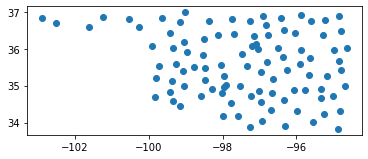

In [5]:
station_info.plot()

netCDF4 file that contains the model elevations of the GEFS grid points. Since the model terrain is smoothed compared to the real-world, the true elevation at a particular lat-lon point will likely not match the elevation in the model. The file contains two elevation variables. The elevation_control variable contains the elevations for the GEFS control run, which is the first ensemble member. The elevation_perturbation variable contains the elevations for the GEFS perturbations, which are the other ensemble members. There are up to 300 m differences in the elevations, so using one instead of the other could have an impact on your model.

In [6]:
elevations_nc = Dataset('../data/gefs_elevations.nc')
print(repr(elevations_nc))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(16), lat(9)
    variables(dimensions): float32 elevation_control(lat, lon), float32 elevation_perturbation(lat, lon), float32 latitude(lat, lon), float32 longitude(lat, lon)
    groups: 


In [7]:
elevations_control = np.array(elevations_nc['elevation_control']).flatten()
elevation_perturbation = np.array(elevations_nc['elevation_perturbation']).flatten()
latitude = np.array(elevations_nc['latitude']).flatten()
longitude = np.array(elevations_nc['longitude']).flatten()

In [265]:
elevations_df = pd.DataFrame([elevations_control,elevation_perturbation,latitude,longitude]).T

In [266]:
elevations_df.columns = ['control','perturbation','latitude','longitude']

In [267]:
elevations_df['longitude']=elevations_df['longitude']-360

In [268]:
elevations_df = gpd.GeoDataFrame(elevations_df,geometry = gpd.points_from_xy(elevations_df['longitude'],elevations_df['latitude']))

In [269]:
elevations_df['forecast_loc_id'] = list(range(len(elevations_df)))

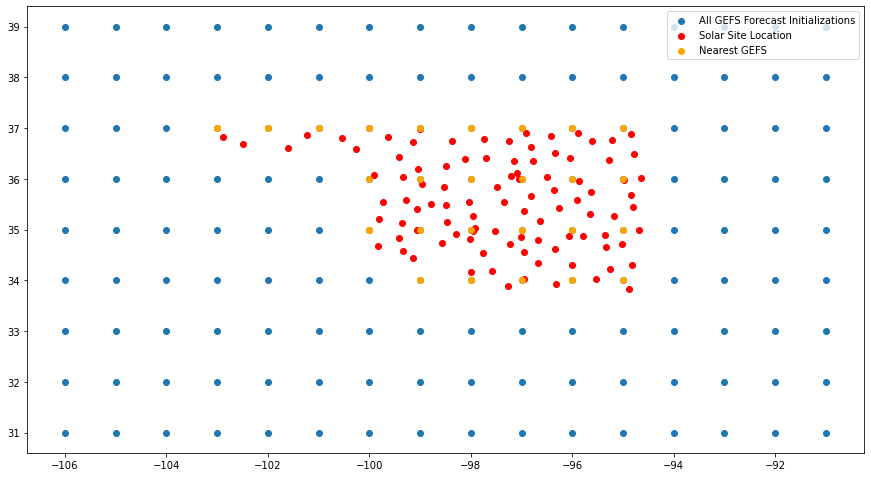

In [284]:
fig,ax = plt.subplots(figsize = [15,10])
elevations_df.plot(ax=ax,label = 'All GEFS Forecast Initializations')
station_info.plot(ax=ax,color = 'red',label = 'Solar Site Location')
elevations_df[elevations_df['forecast_loc_id'].isin(elevation_station[['forecast_loc_id','latitude','longitude']].drop_duplicates()['forecast_loc_id'])].plot(color = 'orange',ax=ax,label = 'Nearest GEFS')
plt.legend()

In [297]:
# limit lat lon matches to those that were a nearest neighbor
gefs_solar_site_table = elevations_df[elevations_df['forecast_loc_id'].isin(elevation_station['forecast_loc_id'])][['forecast_loc_id','latitude','longitude']]

# Join the elevations df with the solar stations via nearest neighbor join. 

We want each solar station (98) to be joined to the nearest forecasting grid point

In [274]:
elevation_station = gpd.sjoin_nearest(station_info,elevations_df,distance_col='distances')

<AxesSubplot:>

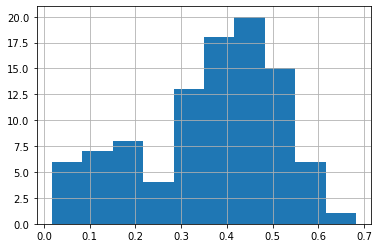

In [250]:
# examine distribution of distances
elevation_station['distances'].hist()

In [287]:
elevation_station = elevation_station[['stid','geometry','control','perturbation','latitude','longitude','forecast_loc_id']]

In [288]:
elevation_station.columns = ['solar_site_id','geometry','control','perturbation','latitude','longitude','forecast_loc_id']

In [289]:
elevation_station

,solar_site_id,geometry,control,perturbation,latitude,longitude,forecast_loc_id
0,ACME,POINT (-98.02325 34.80833),372.147064,393.638275,35.0,-98.0,72
3,APAC,POINT (-98.29216 34.91418),372.147064,393.638275,35.0,-98.0,72
23,CHIC,POINT (-97.91446 35.03236),372.147064,393.638275,35.0,-98.0,72
35,FTCB,POINT (-98.46607 35.14887),372.147064,393.638275,35.0,-98.0,72
39,HINT,POINT (-98.48151 35.48439),372.147064,393.638275,35.0,-98.0,72
...,...,...,...,...,...,...,...
57,MIAM,POINT (-94.84437 36.88832),252.224960,257.140961,37.0,-95.0,107
88,VINI,POINT (-95.22094 36.77536),252.224960,257.140961,37.0,-95.0,107
73,RING,POINT (-97.58812 34.19365),267.404083,293.866455,34.0,-98.0,56
91,WAUR,POINT (-97.98815 34.16775),267.404083,293.866455,34.0,-98.0,56


# unpack the cdf gefs files

Each netCDF4 file contains the total data for one of the model variables and are stored in a multidimensional array. 

The first dimension is the date of the model run and will correspond directly with a row in either the train.csv or sampleSubmission.csv files. 
The second dimension is the ensemble member that the forecast comes from. The GEFS has 11 ensemble members with perturbed initial conditions.
The third dimension is the forecast hour, which runs from 12 to 24 hours in 3 hour increments. All model runs start at 00 UTC, so they will always correspond to the same universal time although local solar time will vary over each year.  
The fourth and fifth dimensions are the latitude and longitude uniform spatial grid. The longitudes in the file are in positive degrees from the Prime Meridian, so subtracting 360 from them will translate them to a similar range of values as in station_info.csv. A visualization of the grid can be seen on the main page.



In [22]:
import glob

In [30]:
train_fp = glob.glob('../data/train/*')

In [76]:
fp = train_fp[3]
ex = Dataset(fp)
keys= list(ex.variables.keys())

In [82]:
for key in keys:
    print(key+', {}'.format(ex[key][:][:].data.shape))
    

time, (5113,)
intTime, (5113,)
lat, (9,)
lon, (16,)
ens, (11,)
fhour, (5,)
intValidTime, (5113, 5)
Temperature_height_above_ground, (5113, 11, 5, 9, 16)


In [84]:
nc_temp = list(ex.variables.values())[-1]


# Exract values from netcdf data structureimport itertools


In [90]:
import itertools
from os import listdir

In [97]:
latlon = list(itertools.product(ex['lat'][:][:].data[2:6], ex['lon'][:][:].data[3:12]))

In [98]:
df_nc_time = pd.DataFrame(ex['intValidTime'][:][:].data)
df_nc_time[0].apply(lambda x: int(str(x)[:8])).head()

0    19940101
1    19940102
2    19940103
3    19940104
4    19940105
Name: 0, dtype: int64

In [100]:
df_nc_time = pd.DataFrame(ex['intValidTime'][:][:].data)
df_nc_time[0].apply(lambda x: int(str(x)[:8])).head()

0    19940101
1    19940102
2    19940103
3    19940104
4    19940105
Name: 0, dtype: int64

In [101]:
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
date_latlon[0]
df_gefs = pd.DataFrame(date_latlon)
df_gefs.shape
df_gefs.rename({0:"date",1:"coordinates"}, axis=1, inplace=True)
df_gefs.head()

,date,coordinates
0,19940101,"(33.0, 257.0)"
1,19940101,"(33.0, 258.0)"
2,19940101,"(33.0, 259.0)"
3,19940101,"(33.0, 260.0)"
4,19940101,"(33.0, 261.0)"


In [92]:
df_gefs = pd.DataFrame()

In [102]:
%%time
#import time
#start_time = time.time()

# Looping through files holding GEFS data  
for f in listdir('../data/train/'):
    # Reading data
    nc_ = Dataset(f'../data/train/{f}')
    # extracting GEFS variable from netcdf
    # nc_gefs = nc_[-1][:]
    nc_gefs = list(nc_.variables.values())[-1]
    # taking mean of the measurements taken in different times
    nc_4dim = np.mean(nc_gefs, axis=2)
    # cropping GEFS based on lat-lon
    nc_4dim_cropped = nc_4dim[:,:,2:6,3:12]
    # reshaping into 2 dimensions & converting to dataframe
    df_gefs_ = pd.DataFrame(nc_4dim_cropped.reshape(5113*4*9,11))
    # we will use the name of file to rename columns so we don't get confused as we keep appending files
    prefix = f.split("latlon")[0]
    # existing columns of dataframe we created
    cols = list(df_gefs_.columns)
    # creating new names for columns
    newcols = [prefix+str(c) for c in cols]
    # creating the dictionary to rename cols accordingly
    rename_cols = {cols[i]: newcols[i] for i in range(len(cols))}
    # changing names on the dataset & inplacing
    df_gefs_ = df_gefs_.rename(rename_cols, axis=1)
    # concating the dataframe 
    df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
    # printing shape to see if data is appended or duplicated
    print(df_gefs.shape)

#print("--- %s seconds ---" % (time.time() - start_time))    

(184068, 13)
(184068, 24)
(184068, 35)
(184068, 46)
(184068, 57)
(184068, 68)
(184068, 79)
(184068, 90)
(184068, 101)
(184068, 112)
(184068, 123)
(184068, 134)
(184068, 145)
(184068, 156)
(184068, 167)
CPU times: user 10.5 s, sys: 889 ms, total: 11.4 s
Wall time: 11.8 s


In [105]:
df_gefs['date']=pd.to_datetime(df_gefs['date'],format="%Y%m%d")

In [112]:
df_gefs = df_gefs.reset_index()

In [143]:
coordinates = np.array(df_gefs['coordinates'].values)

In [146]:
coordinates[0][0]

33.0

In [153]:
lats = []
lons = []
for i in range(184068):
    lons.append(coordinates[i][1])
    lats.append(coordinates[i][0])

In [ ]:
df_gefs

In [154]:
df_gefs['longitude'] =  lons
df_gefs['latitude'] =  lats


In [157]:
df_gefs = gpd.GeoDataFrame(df_gefs,geometry = gpd.points_from_xy(df_gefs['longitude']-360,df_gefs['latitude']))

In [202]:
elevation_station[['forecast_loc_id','latitude','longitude']]

,solar_site_id,geometry,control,perturbation,latitude,longitude,forecast_loc_id
0,ACME,POINT (-98.02325 34.80833),372.147064,393.638275,35.0,-98.0,72
3,APAC,POINT (-98.29216 34.91418),372.147064,393.638275,35.0,-98.0,72
23,CHIC,POINT (-97.91446 35.03236),372.147064,393.638275,35.0,-98.0,72
35,FTCB,POINT (-98.46607 35.14887),372.147064,393.638275,35.0,-98.0,72
39,HINT,POINT (-98.48151 35.48439),372.147064,393.638275,35.0,-98.0,72
...,...,...,...,...,...,...,...
57,MIAM,POINT (-94.84437 36.88832),252.224960,257.140961,37.0,-95.0,107
88,VINI,POINT (-95.22094 36.77536),252.224960,257.140961,37.0,-95.0,107
73,RING,POINT (-97.58812 34.19365),267.404083,293.866455,34.0,-98.0,56
91,WAUR,POINT (-97.98815 34.16775),267.404083,293.866455,34.0,-98.0,56


In [226]:
# need to map the weather conditions at nearest GEFS sites to corresponding solar site via lat/lon matching


In [227]:
station_map.drop_duplicates().shape

(98, 2)

In [203]:
df_gefs['longitude'] = df_gefs['longitude']-360

In [316]:
elevation_station.columns

Index(['solar_site_id', 'geometry', 'control', 'perturbation', 'latitude',
       'longitude', 'forecast_loc_id'],
      dtype='object')

In [318]:
elevation_station[['latitude','longitude','solar_site_id','forecast_loc_id']].drop_duplicates()

,latitude,longitude,solar_site_id,forecast_loc_id
0,35.0,-98.0,ACME,72
3,35.0,-98.0,APAC,72
23,35.0,-98.0,CHIC,72
35,35.0,-98.0,FTCB,72
39,35.0,-98.0,HINT,72
...,...,...,...,...
57,37.0,-95.0,MIAM,107
88,37.0,-95.0,VINI,107
73,34.0,-98.0,RING,56
91,34.0,-98.0,WAUR,56


In [319]:
elevation_station[['solar_site_id','forecast_loc_id']].drop_duplicates()

,solar_site_id,forecast_loc_id
0,ACME,72
3,APAC,72
23,CHIC,72
35,FTCB,72
39,HINT,72
...,...,...
57,MIAM,107
88,VINI,107
73,RING,56
91,WAUR,56


In [323]:
elevation_station

,solar_site_id,geometry,control,perturbation,latitude,longitude,forecast_loc_id
0,ACME,POINT (-98.02325 34.80833),372.147064,393.638275,35.0,-98.0,72
3,APAC,POINT (-98.29216 34.91418),372.147064,393.638275,35.0,-98.0,72
23,CHIC,POINT (-97.91446 35.03236),372.147064,393.638275,35.0,-98.0,72
35,FTCB,POINT (-98.46607 35.14887),372.147064,393.638275,35.0,-98.0,72
39,HINT,POINT (-98.48151 35.48439),372.147064,393.638275,35.0,-98.0,72
...,...,...,...,...,...,...,...
57,MIAM,POINT (-94.84437 36.88832),252.224960,257.140961,37.0,-95.0,107
88,VINI,POINT (-95.22094 36.77536),252.224960,257.140961,37.0,-95.0,107
73,RING,POINT (-97.58812 34.19365),267.404083,293.866455,34.0,-98.0,56
91,WAUR,POINT (-97.98815 34.16775),267.404083,293.866455,34.0,-98.0,56


In [209]:
df_gefs_stations = pd.merge(elevation_station,df_gefs, on =['latitude','longitude'])

In [322]:
df_gefs_stations.groupby(['latitude','longitude','solar_site_id','date'])

array([1])

In [326]:
df_gefs_stations[['latitude','longitude','date','solar_site_id']].drop_duplicates()

,latitude,longitude,date,solar_site_id
0,35.0,-98.0,1994-01-01,ACME
1,35.0,-98.0,1994-01-02,ACME
2,35.0,-98.0,1994-01-03,ACME
3,35.0,-98.0,1994-01-04,ACME
4,35.0,-98.0,1994-01-05,ACME
...,...,...,...,...
398809,34.0,-99.0,2007-12-27,TIPT
398810,34.0,-99.0,2007-12-28,TIPT
398811,34.0,-99.0,2007-12-29,TIPT
398812,34.0,-99.0,2007-12-30,TIPT


In [334]:
df_gefs_stations.columns.values

array(['solar_site_id', 'geometry_x', 'control', 'perturbation',
       'latitude', 'longitude', 'forecast_loc_id', 'index', 'date',
       'coordinates', 'tmp_sfc_0', 'tmp_sfc_1', 'tmp_sfc_2', 'tmp_sfc_3',
       'tmp_sfc_4', 'tmp_sfc_5', 'tmp_sfc_6', 'tmp_sfc_7', 'tmp_sfc_8',
       'tmp_sfc_9', 'tmp_sfc_10', 'apcp_sfc_0', 'apcp_sfc_1',
       'apcp_sfc_2', 'apcp_sfc_3', 'apcp_sfc_4', 'apcp_sfc_5',
       'apcp_sfc_6', 'apcp_sfc_7', 'apcp_sfc_8', 'apcp_sfc_9',
       'apcp_sfc_10', 'dswrf_sfc_0', 'dswrf_sfc_1', 'dswrf_sfc_2',
       'dswrf_sfc_3', 'dswrf_sfc_4', 'dswrf_sfc_5', 'dswrf_sfc_6',
       'dswrf_sfc_7', 'dswrf_sfc_8', 'dswrf_sfc_9', 'dswrf_sfc_10',
       'tmp_2m_0', 'tmp_2m_1', 'tmp_2m_2', 'tmp_2m_3', 'tmp_2m_4',
       'tmp_2m_5', 'tmp_2m_6', 'tmp_2m_7', 'tmp_2m_8', 'tmp_2m_9',
       'tmp_2m_10', 'spfh_2m_0', 'spfh_2m_1', 'spfh_2m_2', 'spfh_2m_3',
       'spfh_2m_4', 'spfh_2m_5', 'spfh_2m_6', 'spfh_2m_7', 'spfh_2m_8',
       'spfh_2m_9', 'spfh_2m_10', 'ulwrf_sfc_0', 'ulw

# Finish the training data analysis env

### Join the response variable into the weather forecast ensembles


In [ ]:
df_train_csv

In [370]:
df_train_csv_stacked = df_train_csv.melt(id_vars='Date')

In [374]:
df_train_csv_stacked.columns = ['date','solar_site_id','power_gen']

In [376]:
# perform the final merge
analysis_env = pd.merge(df_gefs_stations,df_train_csv_stacked, on = ['date','solar_site_id'])

In [380]:
analysis_env=analysis_env[['solar_site_id', 'control', 'perturbation',
       'latitude', 'longitude', 'forecast_loc_id', 'date',
       'coordinates', 'tmp_sfc_0', 'tmp_sfc_1', 'tmp_sfc_2', 'tmp_sfc_3',
       'tmp_sfc_4', 'tmp_sfc_5', 'tmp_sfc_6', 'tmp_sfc_7', 'tmp_sfc_8',
       'tmp_sfc_9', 'tmp_sfc_10', 'apcp_sfc_0', 'apcp_sfc_1',
       'apcp_sfc_2', 'apcp_sfc_3', 'apcp_sfc_4', 'apcp_sfc_5',
       'apcp_sfc_6', 'apcp_sfc_7', 'apcp_sfc_8', 'apcp_sfc_9',
       'apcp_sfc_10', 'dswrf_sfc_0', 'dswrf_sfc_1', 'dswrf_sfc_2',
       'dswrf_sfc_3', 'dswrf_sfc_4', 'dswrf_sfc_5', 'dswrf_sfc_6',
       'dswrf_sfc_7', 'dswrf_sfc_8', 'dswrf_sfc_9', 'dswrf_sfc_10',
       'tmp_2m_0', 'tmp_2m_1', 'tmp_2m_2', 'tmp_2m_3', 'tmp_2m_4',
       'tmp_2m_5', 'tmp_2m_6', 'tmp_2m_7', 'tmp_2m_8', 'tmp_2m_9',
       'tmp_2m_10', 'spfh_2m_0', 'spfh_2m_1', 'spfh_2m_2', 'spfh_2m_3',
       'spfh_2m_4', 'spfh_2m_5', 'spfh_2m_6', 'spfh_2m_7', 'spfh_2m_8',
       'spfh_2m_9', 'spfh_2m_10', 'ulwrf_sfc_0', 'ulwrf_sfc_1',
       'ulwrf_sfc_2', 'ulwrf_sfc_3', 'ulwrf_sfc_4', 'ulwrf_sfc_5',
       'ulwrf_sfc_6', 'ulwrf_sfc_7', 'ulwrf_sfc_8', 'ulwrf_sfc_9',
       'ulwrf_sfc_10', 'tmin_2m_0', 'tmin_2m_1', 'tmin_2m_2', 'tmin_2m_3',
       'tmin_2m_4', 'tmin_2m_5', 'tmin_2m_6', 'tmin_2m_7', 'tmin_2m_8',
       'tmin_2m_9', 'tmin_2m_10', 'tmax_2m_0', 'tmax_2m_1', 'tmax_2m_2',
       'tmax_2m_3', 'tmax_2m_4', 'tmax_2m_5', 'tmax_2m_6', 'tmax_2m_7',
       'tmax_2m_8', 'tmax_2m_9', 'tmax_2m_10', 'ulwrf_tatm_0',
       'ulwrf_tatm_1', 'ulwrf_tatm_2', 'ulwrf_tatm_3', 'ulwrf_tatm_4',
       'ulwrf_tatm_5', 'ulwrf_tatm_6', 'ulwrf_tatm_7', 'ulwrf_tatm_8',
       'ulwrf_tatm_9', 'ulwrf_tatm_10', 'dlwrf_sfc_0', 'dlwrf_sfc_1',
       'dlwrf_sfc_2', 'dlwrf_sfc_3', 'dlwrf_sfc_4', 'dlwrf_sfc_5',
       'dlwrf_sfc_6', 'dlwrf_sfc_7', 'dlwrf_sfc_8', 'dlwrf_sfc_9',
       'dlwrf_sfc_10', 'pwat_eatm_0', 'pwat_eatm_1', 'pwat_eatm_2',
       'pwat_eatm_3', 'pwat_eatm_4', 'pwat_eatm_5', 'pwat_eatm_6',
       'pwat_eatm_7', 'pwat_eatm_8', 'pwat_eatm_9', 'pwat_eatm_10',
       'pres_msl_0', 'pres_msl_1', 'pres_msl_2', 'pres_msl_3',
       'pres_msl_4', 'pres_msl_5', 'pres_msl_6', 'pres_msl_7',
       'pres_msl_8', 'pres_msl_9', 'pres_msl_10', 'tcolc_eatm_0',
       'tcolc_eatm_1', 'tcolc_eatm_2', 'tcolc_eatm_3', 'tcolc_eatm_4',
       'tcolc_eatm_5', 'tcolc_eatm_6', 'tcolc_eatm_7', 'tcolc_eatm_8',
       'tcolc_eatm_9', 'tcolc_eatm_10', 'uswrf_sfc_0', 'uswrf_sfc_1',
       'uswrf_sfc_2', 'uswrf_sfc_3', 'uswrf_sfc_4', 'uswrf_sfc_5',
       'uswrf_sfc_6', 'uswrf_sfc_7', 'uswrf_sfc_8', 'uswrf_sfc_9',
       'uswrf_sfc_10', 'tcdc_eatm_0', 'tcdc_eatm_1', 'tcdc_eatm_2',
       'tcdc_eatm_3', 'tcdc_eatm_4', 'tcdc_eatm_5', 'tcdc_eatm_6',
       'tcdc_eatm_7', 'tcdc_eatm_8', 'tcdc_eatm_9', 'tcdc_eatm_10', 'power_gen']]

In [383]:
corr_mat = analysis_env.corr()

In [399]:
corr_mat = analysis_env.corr()
corr_mat['power_gen'].abs().sort_values(ascending = False)

power_gen       1.000000
dswrf_sfc_10    0.796839
dswrf_sfc_1     0.793704
dswrf_sfc_3     0.786352
dswrf_sfc_9     0.773591
dswrf_sfc_5     0.770870
dswrf_sfc_2     0.769821
dswrf_sfc_0     0.767505
dswrf_sfc_4     0.767453
dswrf_sfc_8     0.758983
dswrf_sfc_7     0.756089
dswrf_sfc_6     0.753969
uswrf_sfc_10    0.691915
uswrf_sfc_1     0.678836
uswrf_sfc_3     0.667555
uswrf_sfc_9     0.655433
uswrf_sfc_8     0.654869
uswrf_sfc_4     0.650523
uswrf_sfc_0     0.645935
uswrf_sfc_2     0.643757
Name: power_gen, dtype: float64

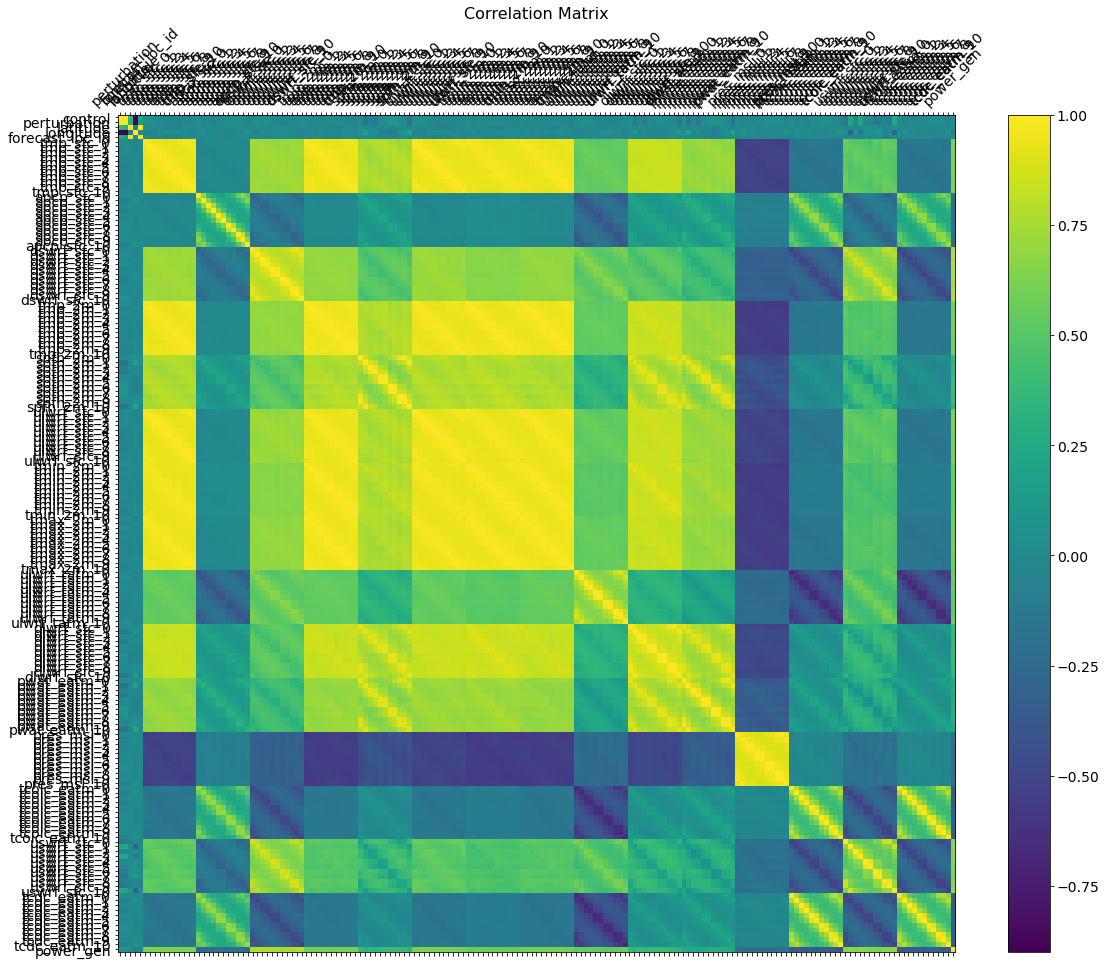

In [389]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_mat, fignum=f.number)
plt.xticks(range(corr_mat.select_dtypes(['number']).shape[1]), corr_mat.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(corr_mat.select_dtypes(['number']).shape[1]), corr_mat.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [401]:
analysis_env.to_csv('analysis_env.csv')